# IMAGES AND TENSORFLOW 

In [1]:
# import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from tensorflow import keras

from kaggle.api.kaggle_api_extended import KaggleApi

# Load the os library
import os

# Load the request module
import urllib.request

# Import SSL which we need to setup for talking to the HTTPS server
import ssl
import json 
from PIL import Image 

plt.style.use('ggplot')

In [2]:
# download image dataset using kaggle api 
# code modified from: https://git.arts.ac.uk/21037726/cci-ual-coding-two-cpp/blob/master/homework_submission/jupyter/homework3_image_transformation.ipynb cell 2

download_folder_path = './pokemon-images-and-types'

dataset_folder_path = download_folder_path + '/data/pokemon-images-and-types/'

# load the kaggle key data from a json file
kaggle_key_path = "C:/Users/Bruger/.kaggle/kaggle.json"
kaggle_credentials = json.loads(open(kaggle_key_path, 'r').read())

# include the kaggle key in the environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

dataset_name = 'vishalsubbiah/pokemon-images-and-types'

# initialise the connection with the Kaggle server and authenticate
api = KaggleApi()
api.authenticate()

# download the dataset
api.dataset_download_files(dataset_name, dataset_folder_path, unzip=True)

In [3]:
ssl._create_default_https_context = ssl._create_unverified_context

# Create a directory
try: 
    os.mkdir('pokemon')     # create folder for pokemons

    # Now perform the following 100 times:
    for img_i in range(1, 101):

        # create a string using the current loop counter
        f = '000%03d.jpg' % img_i

        # and get the url with that string appended the end
        url = 'https://www.kaggle.com/datasets/vishalsubbiah/pokemon-images-and-types' + f

        # We'll print this out to the console so we can see how far we've gone
        print(url, end='\r')

        # And now download the url to a location inside our new directory
        urllib.request.urlretrieve(url, os.path.join('pokemon', f))
except:
    #os.rm('img_align_celeba')
    print("You may need to delete the existing 'pokemon' folder in your directory")

You may need to delete the existing 'pokemon' folder in your directory


In [4]:
data_path = 'data/pokemon'
files = os.listdir(data_path)    # img.<tab>

print(os.path.join(data_path, files[0]))
plt.imread(os.path.join(data_path, files[0]))

files = [os.path.join(data_path, file_i)
 for file_i in os.listdir(data_path)
 if '.png' in file_i]

#print(files)

# There should be 100 files, with the last one being number 99
img = plt.imread(files[99]) 

# np array with all the images
imgs = np.array([plt.imread(files[file_i]) for file_i in range(100)])   


data/pokemon\abomasnow.png


In [5]:
# Lets look at our data 
imgs.shape     # a 100 images, with dimensions 120 x 120 and 4 channels RGBA 

# dimensions of our image 
h = img.shape[0]
w = img.shape[1]
c = img.shape[2]
print(w, h,c)

#Looking at pixels
#Pixel in the middle
mid_y = int(h/2)
mid_x = int(w/2)
print(img[mid_y,mid_x])

120 120 4
[0.53333336 0.73333335 0.8666667  1.        ]


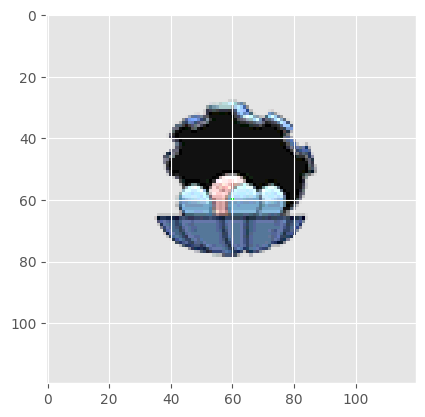

In [6]:
# make copy of the image 
new_img = img.copy()

# change the colour of the middle pixel - this is hard to see, but it is there! 
new_img[mid_y,mid_x] = (0,1,0,1)
plt.imshow(new_img)

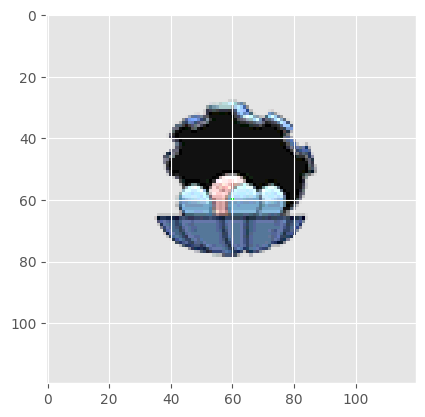

In [7]:
# make part of image another color       ->   DEN HER KAN DU EVT. DROPPE! 
new_img[0,100] = (0.2,0.7,0.2,1)
plt.imshow(new_img)


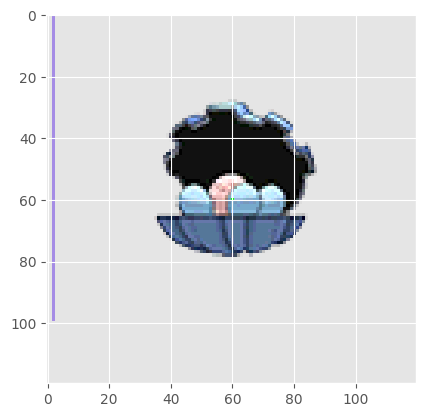

In [8]:
for i in range(0,w):           # all the vertical pixels
    for k in range(0,h):       # all the horizontal pixels
        new_img[0:100,2] =  (0.4,0.2,0.9,0.5)
plt.imshow(new_img)

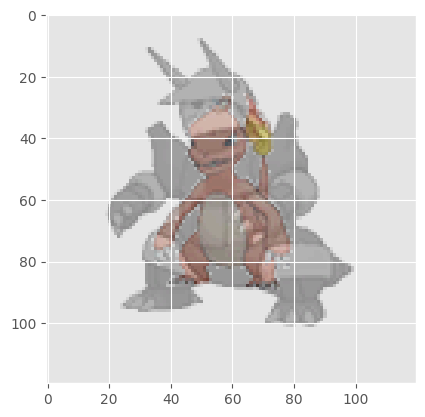

In [9]:
# blend two images based on user inputs
def blend(user_input1,user_input2,transparency):
     blend = imgs[user_input1] * transparency + imgs[user_input2] * transparency      # makes the merging transparent, so both images are potentially visible
     show_blend = plt.imshow(blend)
     return show_blend

blend(int(input('Choose your pokemon! Write a number from 0-99: ')),int(input('Choose your second pokemon! Write a number from 0-99: ')),float(input('Choose a float between 0-1: ')))